In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("doun")

doun


In [3]:
df = pd.read_csv("./US_Accidents_March23.csv")
df.head(5)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [5]:
df = df[['Start_Time', 'Start_Lat', 'Start_Lng',
         'Temperature(F)', 'Visibility(mi)',
         'Weather_Condition', 'Severity','Sunrise_Sunset']]


In [6]:
df.head(5)

,Start_Time,Start_Lat,Start_Lng,Temperature(F),Visibility(mi),Weather_Condition,Severity,Sunrise_Sunset
0,2016-02-08 05:46:00,39.865147,-84.058723,36.9,10.0,Light Rain,3,Night
1,2016-02-08 06:07:59,39.928059,-82.831184,37.9,10.0,Light Rain,2,Night
2,2016-02-08 06:49:27,39.063148,-84.032608,36.0,10.0,Overcast,2,Night
3,2016-02-08 07:23:34,39.747753,-84.205582,35.1,9.0,Mostly Cloudy,3,Night
4,2016-02-08 07:39:07,39.627781,-84.188354,36.0,6.0,Mostly Cloudy,2,Day


In [7]:
df.shape

(7728394, 8)

In [8]:
df.isnull().sum()

Start_Time                0
Start_Lat                 0
Start_Lng                 0
Temperature(F)       163853
Visibility(mi)       177098
Weather_Condition    173459
Severity                  0
Sunrise_Sunset        23246
dtype: int64

In [9]:
df['Temperature(F)'] = df['Temperature(F)'].fillna(df['Temperature(F)'].median())

In [10]:
df['Visibility(mi)'] = df['Visibility(mi)'].fillna(df['Visibility(mi)'].median())

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Start_Time         object 
 1   Start_Lat          float64
 2   Start_Lng          float64
 3   Temperature(F)     float64
 4   Visibility(mi)     float64
 5   Weather_Condition  object 
 6   Severity           int64  
 7   Sunrise_Sunset     object 
dtypes: float64(4), int64(1), object(3)
memory usage: 471.7+ MB


In [12]:
df.describe()

,Start_Lat,Start_Lng,Temperature(F),Visibility(mi),Severity
count,7.728394e+06,7.728394e+06,7.728394e+06,7.728394e+06,7.728394e+06
mean,3.620119e+01,-9.470255e+01,6.171283e+01,9.111221e+00,2.212384e+00
std,5.076079e+00,1.739176e+01,1.881403e+01,2.660819e+00,4.875313e-01
min,2.455480e+01,-1.246238e+02,-8.900000e+01,0.000000e+00,1.000000e+00
25%,3.339963e+01,-1.172194e+02,5.000000e+01,1.000000e+01,2.000000e+00
50%,3.582397e+01,-8.776662e+01,6.400000e+01,1.000000e+01,2.000000e+00
75%,4.008496e+01,-8.035368e+01,7.600000e+01,1.000000e+01,2.000000e+00
max,4.900220e+01,-6.711317e+01,2.070000e+02,1.400000e+02,4.000000e+00


In [13]:
df['Weather_Condition'] = df['Weather_Condition'].fillna(df['Weather_Condition'].mode()[0])

In [14]:
df['Sunrise_Sunset'] = df['Sunrise_Sunset'].fillna(df['Sunrise_Sunset'].mode()[0])

In [15]:
df[["Temperature(F)","Visibility(mi)","Weather_Condition","Sunrise_Sunset"]].isnull().sum()

Temperature(F)       0
Visibility(mi)       0
Weather_Condition    0
Sunrise_Sunset       0
dtype: int64

In [16]:
df.drop_duplicates(inplace=True)

In [17]:

df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='mixed')

df['Hour'] = df['Start_Time'].dt.hour
df['DayOfWeek'] = df['Start_Time'].dt.dayofweek
df['Month'] = df['Start_Time'].dt.month

df[['Start_Time', 'Hour', 'DayOfWeek','Month']].head()

,Start_Time,Hour,DayOfWeek,Month
0,2016-02-08 05:46:00,5,0,2
1,2016-02-08 06:07:59,6,0,2
2,2016-02-08 06:49:27,6,0,2
3,2016-02-08 07:23:34,7,0,2
4,2016-02-08 07:39:07,7,0,2


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Owner\AppData\Local\Temp\ipykernel_6684\3848871411.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=df, palette='viridis')
C:\Users\Owner\AppData\Local\Temp\ipykernel_6684\3848871411.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Severity', data=df, palette='magma')


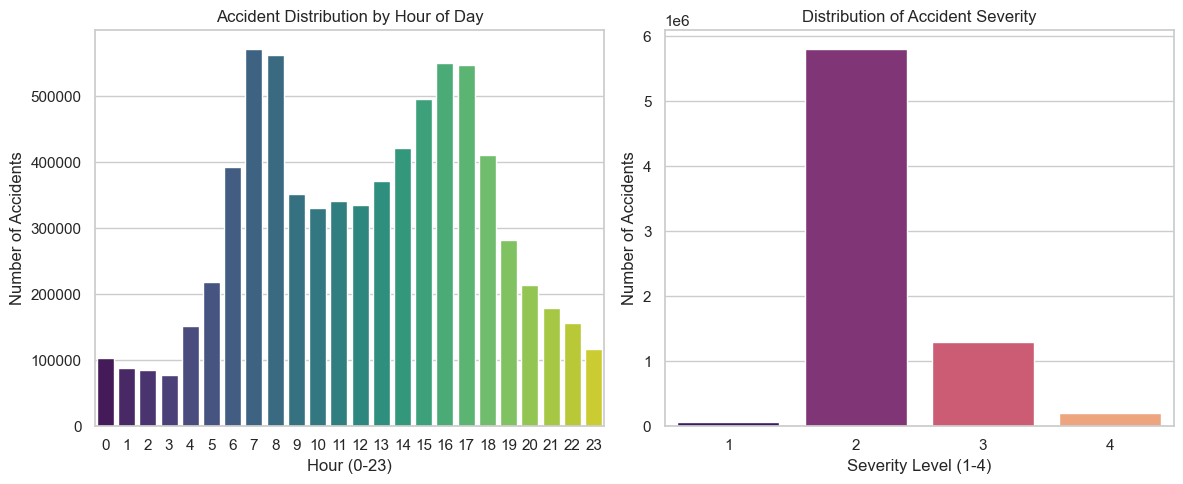

In [19]:

# ضبط شكل الرسوم البيانية
sns.set(style="whitegrid")
plt.figure(figsize=(12, 5))

# 1. رسم توزيع الحوادث خلال ساعات اليوم
plt.subplot(1, 2, 1)
sns.countplot(x='Hour', data=df, palette='viridis')
plt.title('Accident Distribution by Hour of Day')
plt.xlabel('Hour (0-23)')
plt.ylabel('Number of Accidents')

# 2. رسم توزيع شدة الحوادث
plt.subplot(1, 2, 2)
sns.countplot(x='Severity', data=df, palette='magma')
plt.title('Distribution of Accident Severity')
plt.xlabel('Severity Level (1-4)')
plt.ylabel('Number of Accidents')

plt.tight_layout()

plt.savefig('accident_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
# 1. تحويل Sunrise_Sunset (خيارين فقط)
le = LabelEncoder()
df['Sunrise_Sunset'] = le.fit_transform(df['Sunrise_Sunset'].astype(str))

In [22]:
# 2. تحويل Weather_Condition (خيارات متعددة)
# سنأخذ أشهر 10 حالات طقس فقط لكي لا يزداد عدد الأعمدة بشكل جنوني
top_weather = df['Weather_Condition'].value_counts().nlargest(10).index
df['Weather_Condition'] = df['Weather_Condition'].apply(lambda x: x if x in top_weather else 'Other')

In [23]:
# استخدام get_dummies للتحويل لـ One-Hot Encoding
df = pd.get_dummies(df, columns=['Weather_Condition'], drop_first=True)

In [24]:
df.head()

,Start_Time,Start_Lat,Start_Lng,Temperature(F),Visibility(mi),Severity,Sunrise_Sunset,Hour,DayOfWeek,Month,Weather_Condition_Cloudy,Weather_Condition_Fair,Weather_Condition_Fog,Weather_Condition_Light Rain,Weather_Condition_Light Snow,Weather_Condition_Mostly Cloudy,Weather_Condition_Other,Weather_Condition_Overcast,Weather_Condition_Partly Cloudy,Weather_Condition_Scattered Clouds
0,2016-02-08 05:46:00,39.865147,-84.058723,36.9,10.0,3,1,5,0,2,False,False,False,True,False,False,False,False,False,False
1,2016-02-08 06:07:59,39.928059,-82.831184,37.9,10.0,2,1,6,0,2,False,False,False,True,False,False,False,False,False,False
2,2016-02-08 06:49:27,39.063148,-84.032608,36.0,10.0,2,1,6,0,2,False,False,False,False,False,False,False,True,False,False
3,2016-02-08 07:23:34,39.747753,-84.205582,35.1,9.0,3,1,7,0,2,False,False,False,False,False,True,False,False,False,False
4,2016-02-08 07:39:07,39.627781,-84.188354,36.0,6.0,2,0,7,0,2,False,False,False,False,False,True,False,False,False,False


In [25]:
df.columns

Index(['Start_Time', 'Start_Lat', 'Start_Lng', 'Temperature(F)',
       'Visibility(mi)', 'Severity', 'Sunrise_Sunset', 'Hour', 'DayOfWeek',
       'Month', 'Weather_Condition_Cloudy', 'Weather_Condition_Fair',
       'Weather_Condition_Fog', 'Weather_Condition_Light Rain',
       'Weather_Condition_Light Snow', 'Weather_Condition_Mostly Cloudy',
       'Weather_Condition_Other', 'Weather_Condition_Overcast',
       'Weather_Condition_Partly Cloudy',
       'Weather_Condition_Scattered Clouds'],
      dtype='object')

In [26]:
if 'Start_Time' in df.columns:
    df.drop('Start_Time', axis=1, inplace=True)

In [27]:
# تحديد الهدف (Target) وهو الشدة، وبقية الأعمدة هي الميزات (Features)
X = df.drop('Severity', axis=1)
y = df['Severity']

In [28]:
# تقسيم البيانات بنسبة 80% تدريب و 20% اختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
# 1. إنشاء النموذج 
# نستخدم n_estimators=50 ليكون التدريب سريعاً في البداية
# نستخدم n_jobs=-1 لاستغلال جميع قدرات المعالج في جهازك لتسريع التدريب
rf_model = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)

In [31]:
# 2. تدريب النموذج (Training)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)

In [32]:
# 3. التنبؤ (Prediction) على بيانات الاختبار التي عزلناها سابقاً
y_pred = rf_model.predict(X_test)

In [33]:
# 4. حساب الدقة (Accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ تم التدريب بنجاح! دقة النموذج هي: {accuracy * 100:.2f}%")

✅ تم التدريب بنجاح! دقة النموذج هي: 81.53%


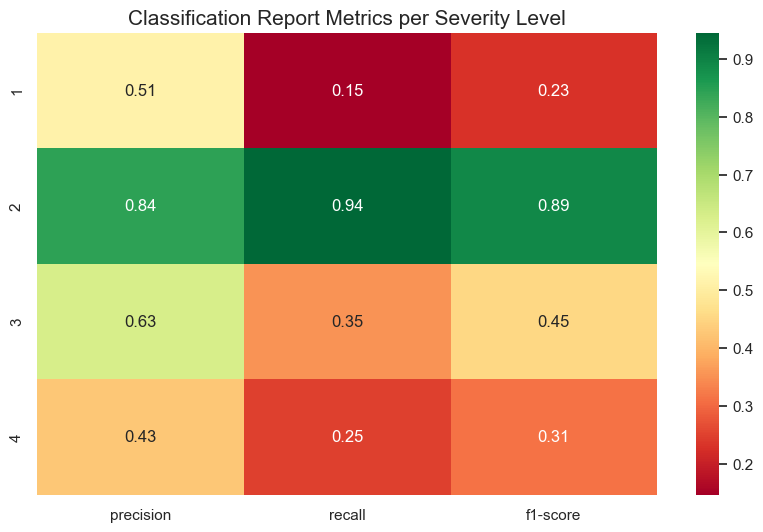

In [34]:
from sklearn.metrics import classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. استخراج التقرير كـ Dictionary لتحويله لجدول
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).iloc[:-1, :].T

# 2. رسم التقرير بشكل مرئي (Heatmap)
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-3, :], annot=True, cmap='RdYlGn', fmt='.2f')
plt.title('Classification Report Metrics per Severity Level', fontsize=15)
plt.savefig('ClassificationReport.png', dpi=300, bbox_inches='tight')
plt.show()

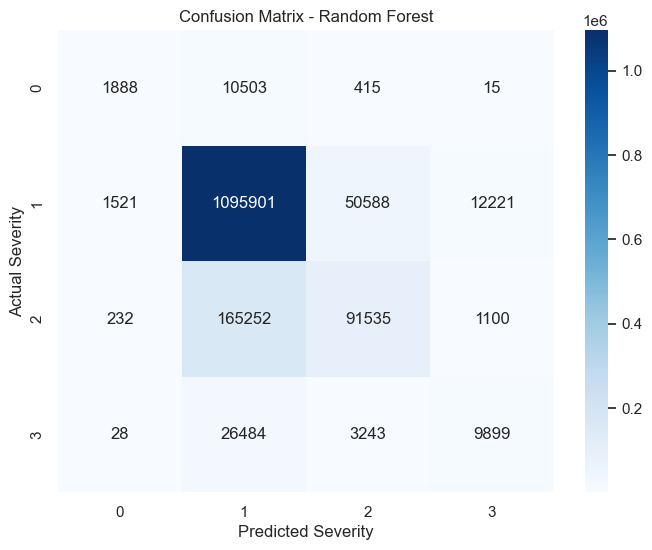

In [35]:
# رسم مصفوفة الارتباك
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Severity')
plt.ylabel('Actual Severity')
plt.savefig('ConfusionMatrix.png', dpi=300, bbox_inches='tight')
plt.show()

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 1. إنشاء النموذج
dt_model = DecisionTreeClassifier(random_state=42)

# 2. تدريب النموذج على نفس بيانات التدريب السابقة
dt_model.fit(X_train, y_train)

# 3. التنبؤ
y_pred_dt = dt_model.predict(X_test)

# 4. حساب الدقة
dt_accuracy = accuracy_score(y_test, y_pred_dt)

print(f"✅ دقة شجرة القرار (Decision Tree): {dt_accuracy * 100:.2f}%")
print(f"✅ دقة الغابة العشوائية (Random Forest) السابقة: 81.56%")

✅ دقة شجرة القرار (Decision Tree): 80.61%
✅ دقة الغابة العشوائية (Random Forest) السابقة: 81.56%


In [37]:
import joblib

# هذا الكود لإنشاء نسخة خفيفة جداً من الموديل لتعمل على Flask بدون أخطاء ذاكرة
from sklearn.ensemble import RandomForestClassifier
import joblib

# 1. تدريب موديل صغير (30 شجرة فقط وبعمق محدد)
rf_model_small = RandomForestClassifier(n_estimators=30, max_depth=10, random_state=42)
rf_model_small.fit(X_train, y_train)

# 2. حفظ الموديل الجديد
joblib.dump(rf_model_small, 'traffic_model.pkl')
print("✅ تم إنشاء ملف الموديل الخفيف بنجاح!")

✅ تم إنشاء ملف الموديل الخفيف بنجاح!


In [39]:
from sklearn.metrics import classification_report

# تنبؤ Decision Tree
y_pred_dt = dt_model.predict(X_test)

print("📌 Decision Tree Classification Report:\n")
print(classification_report(y_test, y_pred_dt))


# تنبؤ Random Forest
y_pred_rf = rf_model.predict(X_test)

print("📌 Random Forest Classification Report:\n")
print(classification_report(y_test, y_pred_rf))


📌 Decision Tree Classification Report:

              precision    recall  f1-score   support

           1       0.20      0.23      0.21     12821
           2       0.89      0.88      0.88   1160231
           3       0.58      0.59      0.58    258119
           4       0.25      0.26      0.25     39654

    accuracy                           0.81   1470825
   macro avg       0.48      0.49      0.48   1470825
weighted avg       0.81      0.81      0.81   1470825

📌 Random Forest Classification Report:

              precision    recall  f1-score   support

           1       0.51      0.15      0.23     12821
           2       0.84      0.94      0.89   1160231
           3       0.63      0.35      0.45    258119
           4       0.43      0.25      0.31     39654

    accuracy                           0.82   1470825
   macro avg       0.60      0.42      0.47   1470825
weighted avg       0.79      0.82      0.79   1470825



In [40]:
from sklearn.metrics import confusion_matrix

print("📌 Decision Tree Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred_dt))

print("\n📌 Random Forest Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred_rf))


📌 Decision Tree Confusion Matrix:

[[   2917    8692    1035     177]
 [  10438 1021203  103438   25152]
 [   1194   99652  151460    5813]
 [    162   24220    5157   10115]]

📌 Random Forest Confusion Matrix:

[[   1888   10503     415      15]
 [   1521 1095902   50588   12220]
 [    232  165252   91535    1100]
 [     28   26484    3243    9899]]


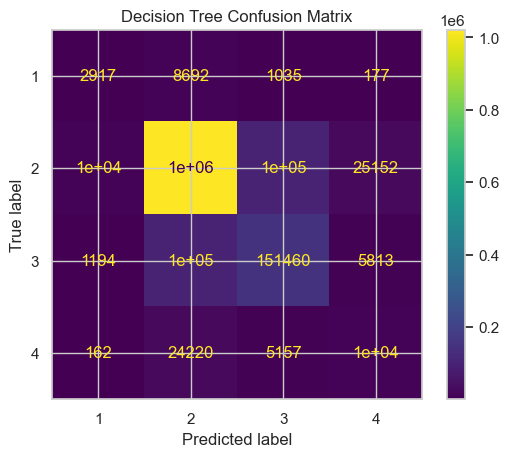

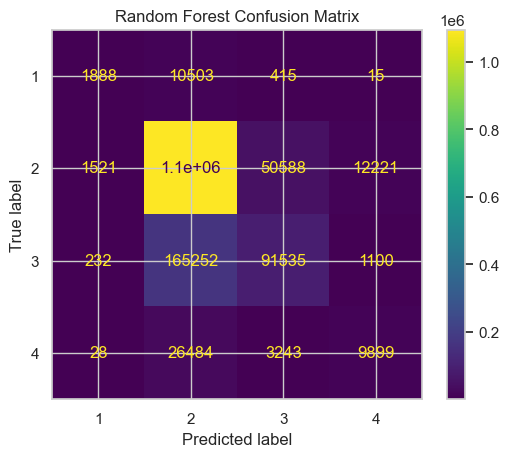

In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Decision Tree
ConfusionMatrixDisplay.from_estimator(dt_model, X_test, y_test)
plt.title("Decision Tree Confusion Matrix")
plt.show()


# Random Forest
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test)
plt.title("Random Forest Confusion Matrix")
plt.savefig('Random Forest Confusion Matrix.png', dpi=300, bbox_inches='tight')

plt.show()


📌 Feature Importance:

                               Feature  Importance
1                            Start_Lng    0.287170
0                            Start_Lat    0.279212
2                       Temperature(F)    0.147619
5                                 Hour    0.090274
7                                Month    0.058789
6                            DayOfWeek    0.058235
3                       Visibility(mi)    0.029895
9               Weather_Condition_Fair    0.014261
4                       Sunrise_Sunset    0.005594
8             Weather_Condition_Cloudy    0.004916
15          Weather_Condition_Overcast    0.004762
13     Weather_Condition_Mostly Cloudy    0.004227
16     Weather_Condition_Partly Cloudy    0.003902
14             Weather_Condition_Other    0.003506
11        Weather_Condition_Light Rain    0.003103
17  Weather_Condition_Scattered Clouds    0.002889
10               Weather_Condition_Fog    0.000829
12        Weather_Condition_Light Snow    0.000818


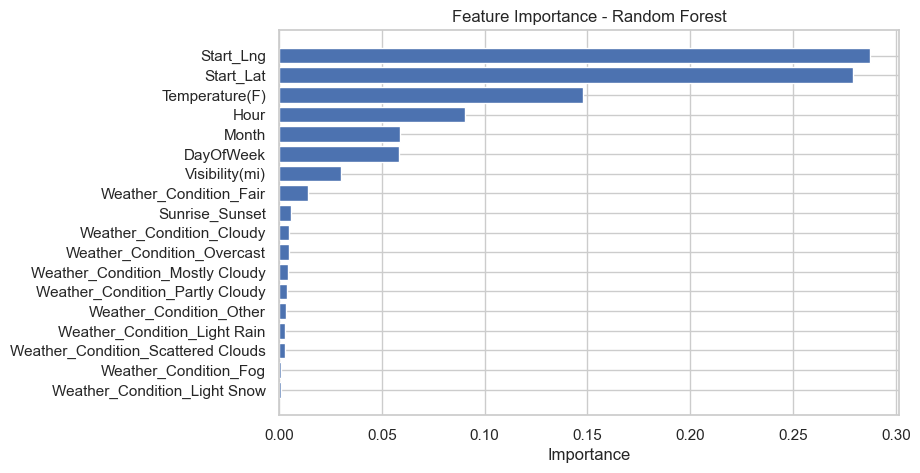

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# استخراج الأهمية
importances = rf_model.feature_importances_
features = X_test.columns

# إنشاء DataFrame مرتب
feat_importance = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("📌 Feature Importance:\n")
print(feat_importance)

# رسم بياني
plt.figure(figsize=(8,5))
plt.barh(feat_importance['Feature'], feat_importance['Importance'])
plt.gca().invert_yaxis()
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.savefig('Random Forest Feature Importance.png', dpi=300, bbox_inches='tight')

plt.show()


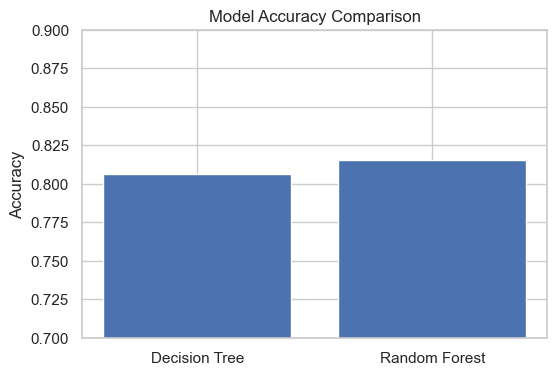

Decision Tree Accuracy: 80.61%
Random Forest Accuracy: 81.53%


In [43]:
from sklearn.metrics import accuracy_score

acc_dt = accuracy_score(y_test, y_pred_dt)
acc_rf = accuracy_score(y_test, y_pred_rf)

models = ['Decision Tree', 'Random Forest']
accuracies = [acc_dt, acc_rf]

plt.figure(figsize=(6,4))
plt.bar(models, accuracies)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0.7, 0.9)
plt.savefig('Model Accuracy Comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Decision Tree Accuracy: {acc_dt*100:.2f}%")
print(f"Random Forest Accuracy: {acc_rf*100:.2f}%")


In [38]:
print(X_train.columns.tolist())

['Start_Lat', 'Start_Lng', 'Temperature(F)', 'Visibility(mi)', 'Sunrise_Sunset', 'Hour', 'DayOfWeek', 'Month', 'Weather_Condition_Cloudy', 'Weather_Condition_Fair', 'Weather_Condition_Fog', 'Weather_Condition_Light Rain', 'Weather_Condition_Light Snow', 'Weather_Condition_Mostly Cloudy', 'Weather_Condition_Other', 'Weather_Condition_Overcast', 'Weather_Condition_Partly Cloudy', 'Weather_Condition_Scattered Clouds']
